# WebScrapping and RandomForestRegressor Model

**The goal here is to get information using web Scrapping and use that information to train a model to predict the Science Score for each Country**

Let's begin importing the libraries:

In [267]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

Using the method ***get*** from ***requests**  library, We can get the information from our source

In [55]:
site = requests.get('https://worldpopulationreview.com/country-rankings/education-rankings-by-country')

The ***BeautifulSoup*** method will help us to get only the content, using the HTML tags from the page as guide

In [56]:
soup = BeautifulSoup(site.content, 'lxml')

Now We can get only the html tag "table" to extract our data

In [57]:
table = soup.find_all('table')[0]

Finally, We can save the table in a variable

In [58]:
data = pd.read_html(str(table))

In [60]:
print(data[0])

        Country  Total Score  Reading Score  Math Score  Science Score
0         China         1731            556         600            575
1     Hong Kong         1637            533         555            549
2       Finland         1631            536         541            554
3     Singapore         1630            526         562            542
4   South Korea         1623            539         546            538
..          ...          ...            ...         ...            ...
60      Albania         1153            385         377            391
61        Qatar         1119            372         368            379
62       Panama         1107            371         360            376
63         Peru         1104            370         365            369
64   Kyrgyzstan          975            314         331            330

[65 rows x 5 columns]


### GOOD!

Let's put this data inside a dataframe Pandas

In [65]:
df = pd.DataFrame(np.array(data[0]).reshape(65,5), columns = ['Country','Total Score','Reading Score','Math Score','Science Score'])

df.head()

,Country,Total Score,Reading Score,Math Score,Science Score
0,China,1731,556,600,575
1,Hong Kong,1637,533,555,549
2,Finland,1631,536,541,554
3,Singapore,1630,526,562,542
4,South Korea,1623,539,546,538


Searching for null/missing values

In [68]:
df.isnull().sum()

Country          0
Total Score      0
Reading Score    0
Math Score       0
Science Score    0
dtype: int64

### Everything looks fine!

### Let's look for the best and the worst ranks in our dataframe

First, import the libraries! I'm using here the ***jupyterthemes*** just to leave our page in dark theme

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot

In [262]:
jtplot.style(theme='onedork', grid = False, context = 'talk', fscale=1.4)

Let's make a funcion that plot a simple bar plot with the 10 best Ranked Countries

In [263]:
def best_info(column):
    Top10 = df.sort_values(column, ascending = False).head(10)
    plt.figure(figsize = (20,8))
    sns.barplot(x = 'Country', y = column, data = Top10)
    

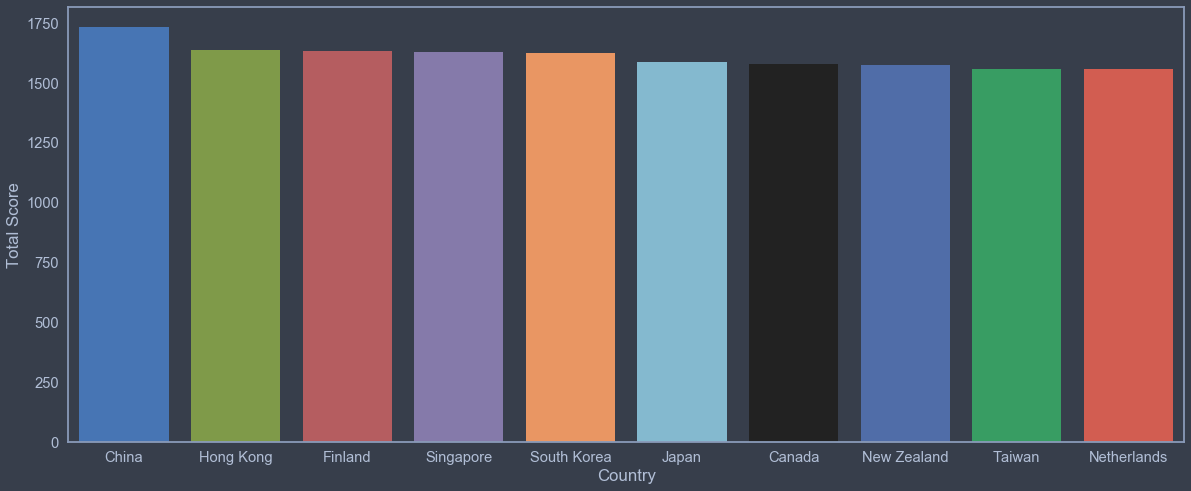

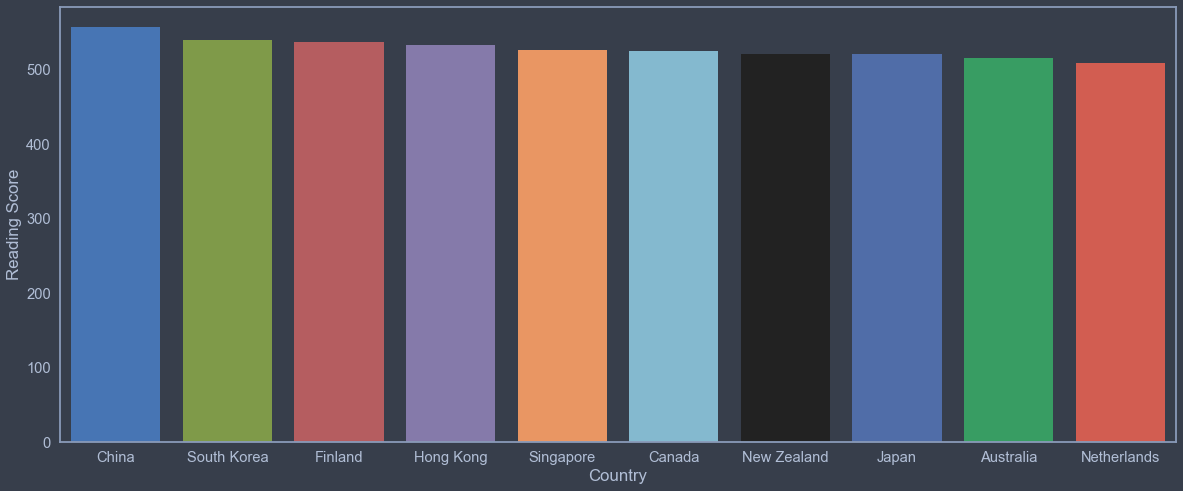

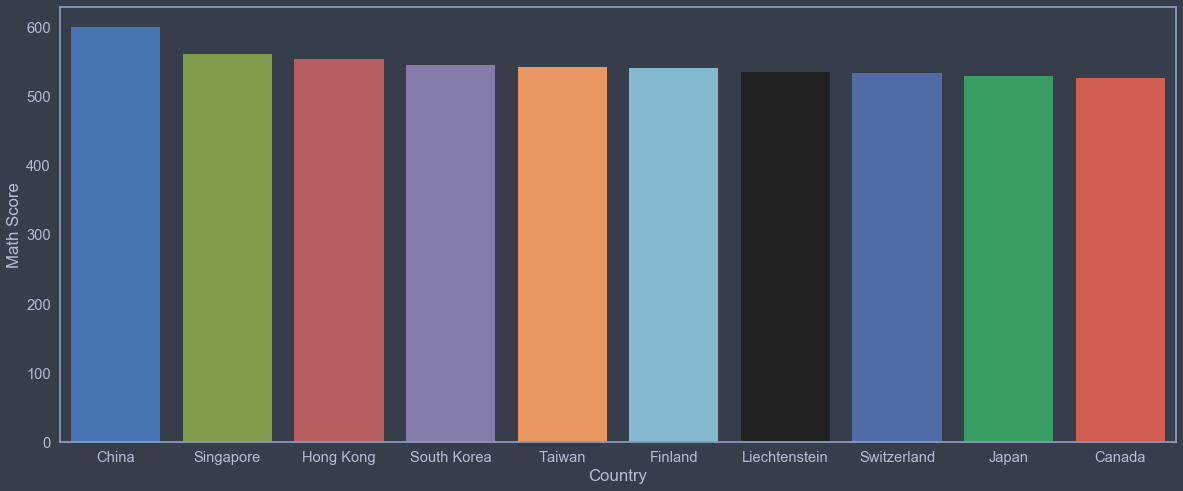

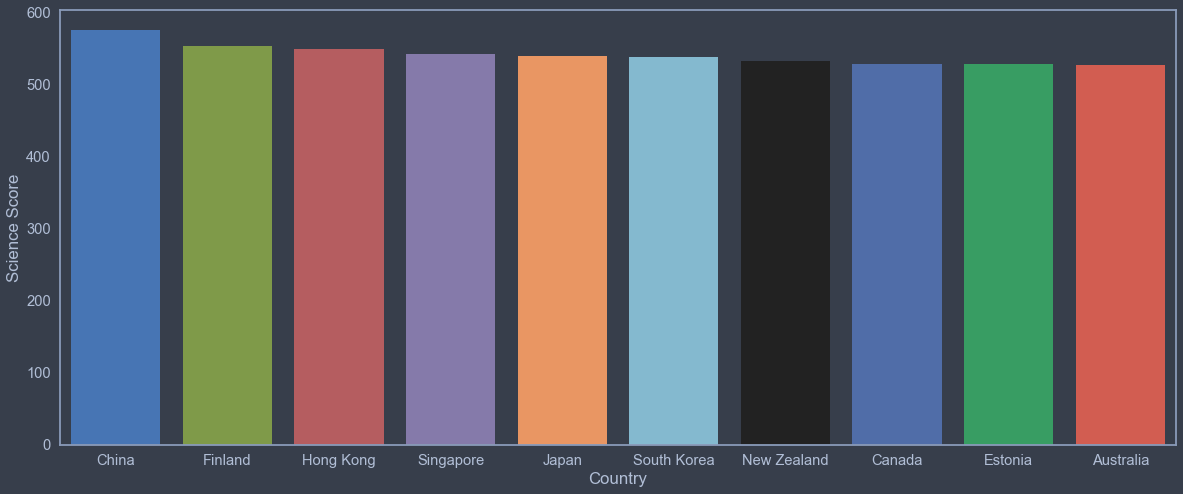

In [264]:
columns = df.columns
for column in columns[1:]:
    best_info(column)

#### Nice!

Let's do the same for the worst-ranked Countries - is just a small change inside our function

In [265]:
def worst_info(column):
    worts10 = df.sort_values(column, ascending = True).head(10)
    plt.figure(figsize = (20,8))
    sns.barplot(x = 'Country', y = column, data = worts10)

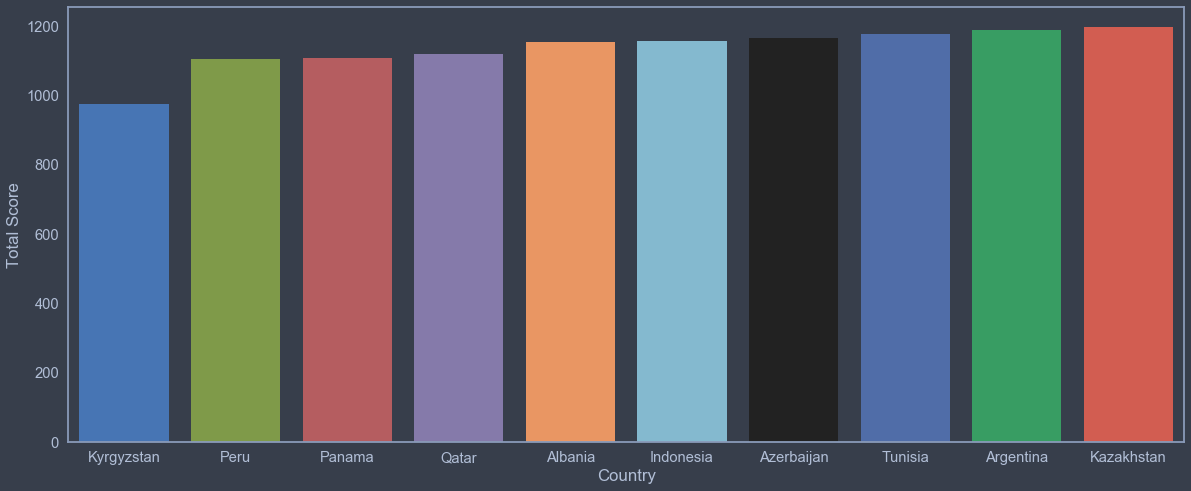

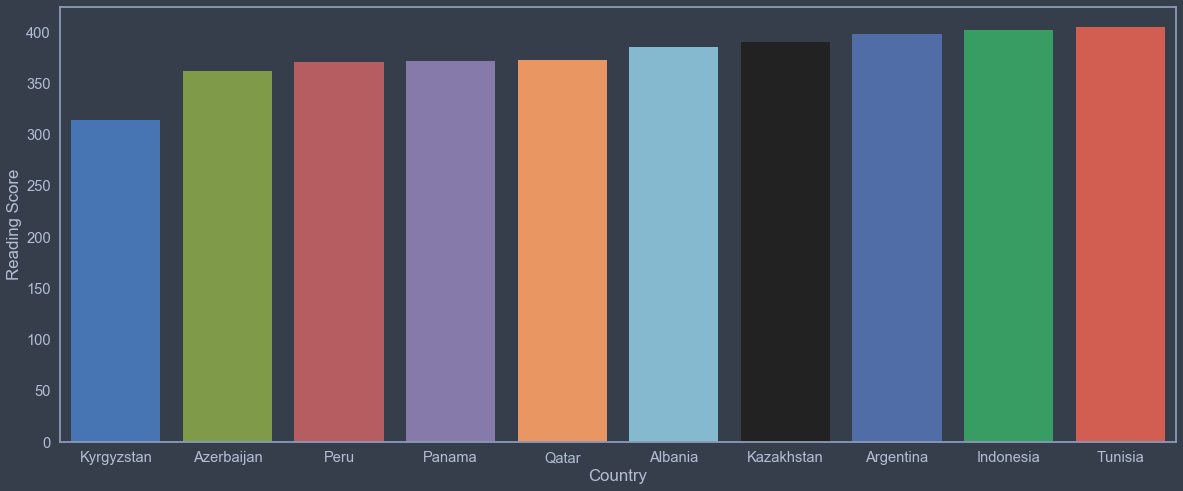

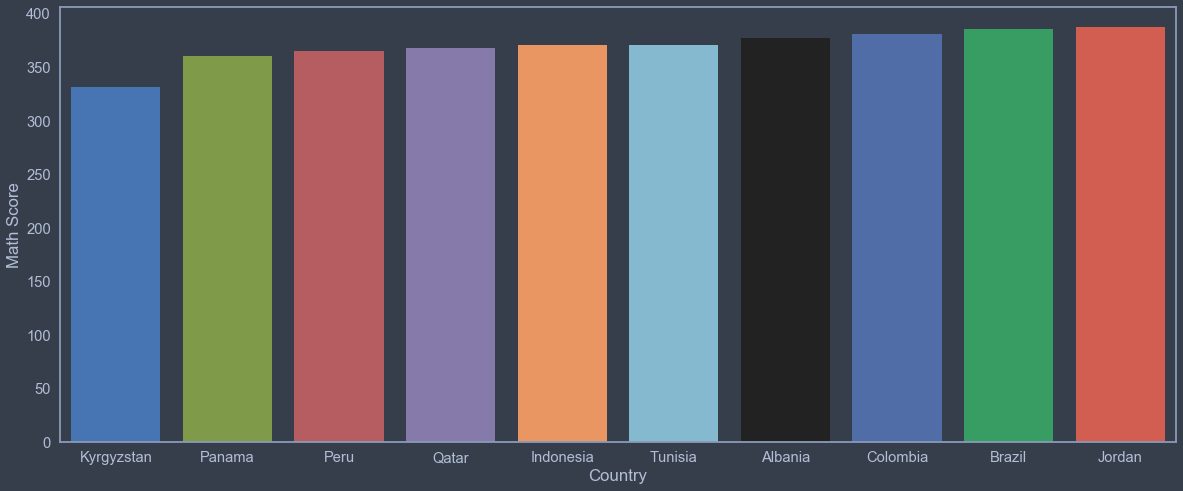

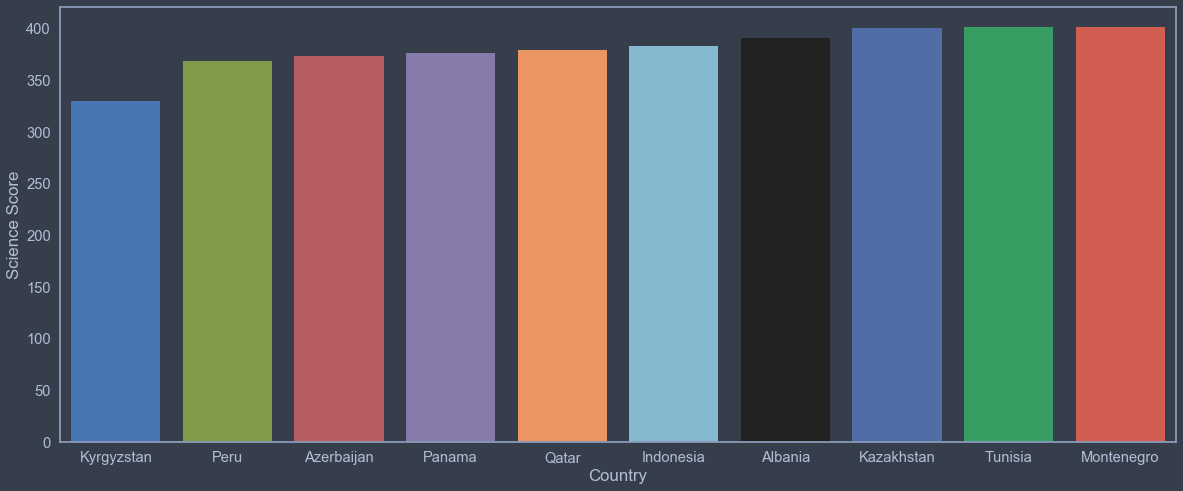

In [266]:
for column in columns[1:]:
    worst_info(column)

### Done!

#### You can try do more investigation, but our goal here is use a Machine Learning model to predict our target

Let's create a function just to see the Highest and Lowest Rank points for each feature - you can use the method ***".describe()"*** too

In [276]:
def Scores(column):
    print('{} lowest rank: {}'.format(column, df[column].min()))
    print('{} Highest rank: {}'.format(column, df[column].max()))
    print('The difference between the Highest to the lowest is {} points'.format(df[column].max() - df[column].min()))


Let's see the extremes of each rank and the difference of each point

In [277]:
for column in columns[1:]:
    Scores(column)
    print('\n')

Total Score lowest rank: 975
Total Score Highest rank: 1731
The difference between the Highest to the lowest is 756 points


Reading Score lowest rank: 314
Reading Score Highest rank: 556
The difference between the Highest to the lowest is 242 points


Math Score lowest rank: 331
Math Score Highest rank: 600
The difference between the Highest to the lowest is 269 points


Science Score lowest rank: 330
Science Score Highest rank: 575
The difference between the Highest to the lowest is 245 points




### Now We can start our Machine Learning Work!

Let's import the train_test_split to divide our data in test and train

In [112]:
from sklearn.model_selection import train_test_split

Our target class is the *Science Score* and We will use the *Reading* and *Math* Scores to try predict the target value

Let's put our target inside the variable ***y*** and our features inside the variable ***x***

In [190]:
x = df[['Reading Score','Math Score']]
y = df['Science Score']

Now we can use the *train_test_split* to create the train and test variables - Let's use only 20% of the data to analyse our model

In [191]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

Today We will use the **Random Forest Regressor** to create our model

In [171]:
from sklearn.ensemble import RandomForestRegressor as rfr

Training our model...

In [212]:
model = rfr(n_estimators = 200)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

Let's predict the results using that 20% the we save previously

In [213]:
pred = model.predict(X_test)

### Is our model good enough?

Let's use the mean squared error and the r2_score to analyse our result

**mean_squared_error**: Measures the average of the squares of the errors, that is, the average squared difference between the estimated values and the actual value

OBS: We will get the squared value of our MSE to get a value in the same range of our data
    
    
**r2_score**: It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model. The best result is 1!

In [282]:
from sklearn.metrics import mean_squared_error, r2_score

In [281]:
error = round(mean_squared_error(y_test, predict),2)*1/2
print('The model has an error of {} points (+ or -) to predict the Total Score'.format(error))

The model has an error of 13.445 points (+ or -) to predict the Total Score


In [284]:
r2Score = round(r2_score(y_test, pred),4)
print('The r2_score is {}%'.format(r2Score*100))

The r2_score is 94.37%


## That's is a good Model!

Our model has a low error and a high r2_score!

Let's try predict the real result of the Science Score of Brazil

first, let's see the Brazil rank and scores

In [107]:
df[df.Country == 'Brazil']

,Country,Total Score,Reading Score,Math Score,Science Score
53,Brazil,1203,412,386,405


### Ok, our model must predict a Science Score near to 405 points

For try this, let's give to the model the real scores and see the result

In [227]:
BRdata = ([[412,386]])

In [235]:
predBrazil = model.predict(BRdata)

In [286]:
print('The Model predict {} of Science Score for Brazil'.format(float(predBrazil)))

The Model predict 403.86 of Science Score for Brazil


In [253]:
difference = round(405-403.86, 4)
print('The model has just {} points of difference from the real value for Total Score from Brazil!'.format(difference))

The model has just 1.14 points of difference from the real value for Total Score from Brazil!


## Wool! Good, Very Good!